# Earth Science Citation Replication Project

## 0. Install Packages

In [21]:
import csv
import pandas as pd
from time import sleep
import re
import os
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.chdir('2020_SourceData')

## 1. Sampling

### Import file
Next, import the csv file that includes your records from Web of Science.

In [4]:
#Import csv

data = pd.read_csv("Boulder_References.csv", encoding="ISO-8859-1")
data

,Institution,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
0,CUBoulder,J,"Picard, A; Gartman, A; Cosmidis, J; Obst, M; V...",NaN,NaN,NaN,"Picard, Aude; Gartman, Amy; Cosmidis, Julie; O...",NaN,NaN,Authigenic metastable iron sulfide minerals pr...,...,13,Geochemistry & Geophysics,Geochemistry & Geophysics,JQ7AA,WOS:000499092400003,NaN,NaN,NaN,NaN,6/19/2020
1,CUBoulder,J,"Coddington, O; Lean, J; Pilewskie, P; Snow, M;...",NaN,NaN,NaN,"Coddington, O.; Lean, J.; Pilewskie, P.; Snow,...",NaN,NaN,Solar Irradiance Variability: Comparisons of M...,...,31,"Astronomy & Astrophysics; Geosciences, Multidi...",Astronomy & Astrophysics; Geology,KM4PD,WOS:000504607600001,NaN,DOAJ Gold,NaN,NaN,6/19/2020
2,CUBoulder,J,"Oak, YJ; Park, RJ; Schroeder, JR; Crawford, JH...",NaN,NaN,NaN,"Oak, Yujin J.; Park, Rokjin J.; Schroeder, Jas...",NaN,NaN,Evaluation of simulated O-3 production efficie...,...,15,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,JZ5PA,WOS:000505152900001,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020
3,CUBoulder,J,"Harder, JW; Beland, S; Snow, M",NaN,NaN,NaN,"Harder, J. W.; Beland, S.; Snow, M.",NaN,NaN,SORCE-Based Solar Spectral Irradiance (SSI) Re...,...,21,"Astronomy & Astrophysics; Geosciences, Multidi...",Astronomy & Astrophysics; Geology,KM4PD,WOS:000504500500001,NaN,DOAJ Gold,NaN,NaN,6/19/2020
4,CUBoulder,J,"Hirashima, H; Avanzi, F; Wever, N",NaN,NaN,NaN,"Hirashima, Hiroyuki; Avanzi, Francesco; Wever,...",NaN,NaN,Wet-Snow Metamorphism Drives the Transition Fr...,...,10,"Geosciences, Multidisciplinary",Geology,KL6AK,WOS:000504537700001,NaN,Other Gold,NaN,NaN,6/19/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,CUBoulder,J,"Lee, H; Shum, CK; Emery, W; Calmant, S; Deng, ...",NaN,NaN,NaN,"Lee, Hyongki; Shum, C. K.; Emery, William; Cal...",NaN,NaN,Validation of Jason-2 Altimeter Data by Wavefo...,...,13,Geochemistry & Geophysics; Oceanography; Remot...,Geochemistry & Geophysics; Oceanography; Remot...,645AI,WOS:000281422900016,NaN,NaN,NaN,NaN,6/19/2020
7435,CUBoulder,J,"Nerem, RS; Chambers, DP; Choe, C; Mitchum, GT",NaN,NaN,NaN,"Nerem, R. S.; Chambers, D. P.; Choe, C.; Mitch...",NaN,NaN,Estimating Mean Sea Level Change from the TOPE...,...,12,Geochemistry & Geophysics; Oceanography; Remot...,Geochemistry & Geophysics; Oceanography; Remot...,645AI,WOS:000281422900023,NaN,NaN,Y,N,6/19/2020
7436,CUBoulder,J,"Smith, BL; Yuter, SE; Neiman, PJ; Kingsmill, DE",NaN,NaN,NaN,"Smith, Barrett L.; Yuter, Sandra E.; Neiman, P...",NaN,NaN,Water Vapor Fluxes and Orographic Precipitatio...,...,27,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,552WO,WOS:000274324900005,NaN,NaN,NaN,NaN,6/19/2020
7437,CUBoulder,J,"Turnbull, JC; Lehman, SJ; Morgan, S; Wolak, C",NaN,NaN,NaN,"Turnbull, Jocelyn C.; Lehman, Scott J.; Morgan...",NaN,NaN,A NEW AUTOMATED EXTRACTION SYSTEM FOR C-14 MEA...,...,9,Geochemistry & Geophysics,Geochemistry & Geophysics,696JO,WOS:000285437900042,NaN,Bronze,NaN,NaN,6/19/2020


### Create a sample

Our total number of records is: 18082

Let's compute the proportion of the total for each institution.

In [5]:
total = 7439 + 5002 + 3863 + 1344
CUB = 7439/total
UCB = 5002/total
UCLA = 4292/total
UH = 1349/total

print('Total = ',total)
print('CUB = ',CUB)
print('UCB = ',UCB)
print('UCLA = ',UCLA)
print('UH = ',UH)

Total =  17648
CUB =  0.4215208522212149
UCB =  0.2834315503173164
UCLA =  0.24320036264732547
UH =  0.07643925657298277


|Institution | Number of Records | Proportion of Total |
|:--- | ---: | ---: |
|CU Boulder | 7439 | .41 | 
|UC Berkeley | 5002 | .28 |
|UCLA | 4292 | .24 |
|UH | 1349 | .07 |

By using `dataframe.sample`, we can generate a random sample. 
Create a sample based on your institution's fraction of the whole set of records.

In [7]:
#Create sample based on .41

cub_sample = data.sample(n = 420)
#add column to track original institution
#ucb_sample['INSTITUTION'] = 'Berkeley'
cub_sample

,Institution,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
1289,CUBoulder,J,"Nusbaumer, J; Noone, D",NaN,NaN,NaN,"Nusbaumer, Jesse; Noone, David",NaN,NaN,Numerical Evaluation of the Modern and Future ...,...,20,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GN9IH,WOS:000439508000007,30381797.0,"Green Accepted, Bronze",NaN,NaN,6/19/2020
1320,CUBoulder,J,"Wagner, A; Heinzeller, D; Wagner, S; Rummler, ...",NaN,NaN,NaN,"Wagner, Andreas; Heinzeller, Dominikus; Wagner...",NaN,NaN,Explicit Convection and Scale-Aware Cumulus Pa...,...,20,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GL4CL,WOS:000437094500014,NaN,Bronze,NaN,NaN,6/19/2020
1716,CUBoulder,B,"Barry, RG; Hall-McKim, EA","Barry, RG; HallMcKim, EA",NaN,NaN,"Barry, Roger G.; Hall-McKim, Eileen A.","Barry, RG; HallMcKim, EA",NaN,"The Setting, History of Studies, and the Clima...",...,20,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,BO7BJ,WOS:000522817700002,NaN,Bronze,NaN,NaN,6/19/2020
4787,CUBoulder,J,"Guillod, BP; Orlowsky, B; Miralles, DG; Teulin...",NaN,NaN,NaN,"Guillod, B. P.; Orlowsky, B.; Miralles, D. G.;...",NaN,NaN,Land-surface controls on afternoon precipitati...,...,25,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,AP3QK,WOS:000341991600008,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020
245,CUBoulder,J,"D'Ambro, EL; Schobesberger, S; Gaston, CJ; Lop...",NaN,NaN,NaN,"D'Ambro, Emma L.; Schobesberger, Siegfried; Ga...",NaN,NaN,Chamber-based insights into the factors contro...,...,13,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,IV8BG,WOS:000484490100002,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,CUBoulder,J,"Castendyk, D; McKnight, D; Welch, K; Niebuhr, ...",NaN,NaN,NaN,"Castendyk, Devin; McKnight, Diane; Welch, Kath...",NaN,NaN,"Pressure-driven, shoreline currents in a peren...",...,20,Water Resources,Water Resources,CG2JP,WOS:000353101000011,NaN,NaN,NaN,NaN,6/19/2020
2243,CUBoulder,J,"Mccoy, TJ; Marquardt, AE; Wasson, JT; Ash, RD;...",NaN,NaN,NaN,"Mccoy, Timothy J.; Marquardt, Amy E.; Wasson, ...",NaN,NaN,"The Anoka, Minnesota iron meteorite as parent ...",...,10,"Anthropology; Archaeology; Geosciences, Multid...",Anthropology; Archaeology; Geology,EV6NC,WOS:000401885100002,NaN,Bronze,NaN,NaN,6/19/2020
5453,CUBoulder,J,"Hanna, E; Jones, JM; Cappelen, J; Mernild, SH;...",NaN,NaN,NaN,"Hanna, Edward; Jones, Julie M.; Cappelen, John...",NaN,NaN,The influence of North Atlantic atmospheric an...,...,19,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,104EE,WOS:000315972400007,NaN,NaN,NaN,NaN,6/19/2020
4983,CUBoulder,J,"Yue, J; Xu, JY; Chang, LC; Wu, Q; Liu, HL; Lu,...",NaN,NaN,NaN,"Yue, Jia; Xu, Jiyao; Chang, Loren C.; Wu, Qian...",NaN,NaN,Global structure and seasonal variability of t...,...,8,Geochemistry & Geophysics; Meteorology & Atmos...,Geochemistry & Geophysics; Meteorology & Atmos...,278TQ,WOS:000328913100021,NaN,NaN,NaN,NaN,6/19/2020


### Export your file

In [8]:
#Export csv

cub_sample.to_csv('cub_sample.csv')

### Create one file from all institutions
1. Combine 4 csvs into 1 file.

Once all samples are added together for 1000 records...
The steps below are tested with berkeley only

## 2. Data Clean up

In [15]:
#Select three columns: Cited References, DOI of paper, and Institution
cub_citedref = cub_sample[['CR', 'DI']]
cub_citedref

,CR,DI
1289,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081
1320,"Arnault J, 2016, J HYDROMETEOROL, V17, P1489, ...",10.1175/MWR-D-17-0238.1
1716,"AMAP, 2017, SNOW WAT IC PERM ARC; AMAP, 2011, ...",NaN
4787,"Aires Filipe, 2014, Journal of Climate, V27, P...",10.5194/acp-14-8343-2014
245,"ATKINSON R, 1987, INT J CHEM KINET, V19, P799,...",10.5194/acp-19-11253-2019
...,...,...
3886,"Adams EE, 1998, ANTARCT RES SER, V72, P281; An...",10.1002/hyp.10352
2243,"ARNOLD JR, 1951, SCIENCE, V113, P111, DOI 10.1...",10.1016/j.jas.2017.03.003
5453,"Abdalati W, 2001, J GEOPHYS RES-ATMOS, V106, P...",10.1002/joc.3475
4983,"Akmaev RA, 2001, GEOPHYS RES LETT, V28, P3817,...",10.1016/j.jastp.2013.10.010


Testing data cleanup method for Berkeley data.
For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
https://gist.github.com/jlln/338b4b0b55bd6984f883

In [16]:
cub_citedref_split = (cub_citedref.set_index(cub_citedref.columns.drop('CR',1).tolist())
   ...:    .CR.str.split('; ', expand=True)
   ...:    .stack()
   ...:    .reset_index()
   ...:    .rename(columns={0:'CR'})
   ...:    .loc[:, cub_citedref.columns]
   ...: )
cub_citedref_split

,CR,DI
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081
...,...,...
24037,"Stening RJ, 1999, J GEOPHYS RES-SPACE, V104, P...",10.1029/2010GL042781
24038,"Stening RJ, 2001, J GEOPHYS RES-SPACE, V106, P...",10.1029/2010GL042781
24039,"TARPLEY JD, 1971, J GEOMAGN GEOELECTR, V23, P1...",10.1029/2010GL042781
24040,"Vial F., 1994, J ATMOS TERR PHYS, V56, P1951",10.1029/2010GL042781


Rather than trying to split the unstructured data, used regex to pull out the DOI into new column:

*note:* 394/500 cited refs included DOI. Those that didn't appear to be a combination of non-journal items or older journal articles.

In [17]:
cub_citedref_split['citedDOI'] = cub_citedref_split['CR'].str.extract('(10\.\S*[^,\s])', expand=True)[0]
cub_citedref_split['citedDOI'] = cub_citedref_split.citedDOI.str.rstrip(']')

In [18]:
cub_citedref_split['INSTITUTION'] = 'CUBoulder'

In [19]:
cub_citedref_split

,CR,DI,citedDOI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,10.1007/s10584-016-1750-x,CUBoulder
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,10.1175/MWR3123.1,CUBoulder
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,10.1002/2014JD022602,CUBoulder
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,10.1175/JCLI-D-14-00623.1,CUBoulder
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,10.1029/2008GL035481,CUBoulder
...,...,...,...,...
24037,"Stening RJ, 1999, J GEOPHYS RES-SPACE, V104, P...",10.1029/2010GL042781,10.1029/98JA02663,CUBoulder
24038,"Stening RJ, 2001, J GEOPHYS RES-SPACE, V106, P...",10.1029/2010GL042781,10.1029/2000JA000175,CUBoulder
24039,"TARPLEY JD, 1971, J GEOMAGN GEOELECTR, V23, P1...",10.1029/2010GL042781,10.5636/jgg.23.169,CUBoulder
24040,"Vial F., 1994, J ATMOS TERR PHYS, V56, P1951",10.1029/2010GL042781,NaN,CUBoulder


Sample of 500 from ucb_citedref+split to test CrossRef for journal metadata

In [29]:
cub_citedref_split.to_csv('cub_citedRef_DOIs.csv', encoding='utf-8')

In [158]:
ucbCRsample = ucb_citedref_split.sample(n=500, random_state=1)

In [159]:
ucbCRsample.reset_index(inplace=True)

In [160]:
ucbCRsample.to_csv('ucbCRsample.csv', encoding='utf-8')

In [22]:
url = 'http://api.crossref.org/works/'
header = {'User-Agent': 'EarthSciCitations (https://github.com/samteplitzky/Earth-Science-Citation-Replication-Project; mailto:philip.white@colorado.edu)'}

## Crossref

Get the article metadata from CrossRef, write to new csv:

In [162]:
with open('CR_SampleTestOut.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Inst','citingDOI','CR','citedDOI', 'title', 'journal_book', 'date','issn1', 'issn1Type', 'issn2', 'issn2Type', 'isbn'])
    for i, row in ucbCRsample.iterrows():
        sleep(.2)
        if pd.notna(row['citedDOI']):
            query = url+row['citedDOI']
            #print(query)
            response = requests.get(query, headers=header)
            if response.status_code == 200:
                data = json.loads(response.content.decode('utf-8'))
                
                if 'container-title' in data['message']:
                    journal = data['message']['container-title']
                    if len(journal) > 0:
                        journal = journal[0]
                    else: journal = 'nan'                    
                else:
                    journal='nan'
                    
                year = data['message']['created']['date-parts'][0][0]
                
                if 'title' in data['message']:
                    title = data['message']['title']
                    if len(title) > 0:
                        title = title[0]
                    else:
                        title = 'nan'
                else:
                    title='nan'
                    
                if 'ISBN' in data['message']:                     
                    isbn = data['message']['ISBN'][0]
                    
                    writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, 'nan', 'nan', 'nan', 'nan', isbn])
                else:
                    
                    if 'ISSN' in data['message']:
                        issn1 = data['message']['issn-type'][0]['value']
                        issn1Type = data['message']['issn-type'][0]['type']
                        
                        if len(data['message']['issn-type'])>1:
                            issn2 = data['message']['issn-type'][1]['value']
                            issn2Type = data['message']['issn-type'][1]['type']
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, issn2, issn2Type,'nan'])
                        
                        else:
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, 'nan', 'nan','nan'])
            else:
                writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'],'nan','nan', 'nan', 'nan', 'nan', 'nan', 'nan','nan'])
        else:
            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], 'nan','nan','nan', 'nan', 'nan', 'nan', 'nan','nan'])

http://api.crossref.org/works/10.1111/j.1466-8238.2010.00551.x
http://api.crossref.org/works/10.1016/j.advwatres.2014.04.001
http://api.crossref.org/works/10.2307/1565446
http://api.crossref.org/works/10.1130/G32294.1
http://api.crossref.org/works/10.1029/1999JA000188
http://api.crossref.org/works/10.1016/j.lithos.2006.04.002
http://api.crossref.org/works/10.1016/j.ijms.2015.08.011
http://api.crossref.org/works/10.1186/1471-2105-11-395
http://api.crossref.org/works/10.1002/2015JA021358
http://api.crossref.org/works/10.1016/S0038-0717(01)00096-7
http://api.crossref.org/works/10.1080/02786826.2016.1147645
http://api.crossref.org/works/10.1139/e76-131
http://api.crossref.org/works/10.1029/2008GL036194
http://api.crossref.org/works/10.5194/se-2-25-2011
http://api.crossref.org/works/10.1890/0012-9658(2000)081[2359:MESELD]2.0.CO;2
http://api.crossref.org/works/10.2136/sssaj1999.6351188x
http://api.crossref.org/works/10.1017/S0033822200039072
http://api.crossref.org/works/10.1029/2004JD005124

http://api.crossref.org/works/10.1016/j.envpol.2006.04.013
http://api.crossref.org/works/10.1002/wrcr.20089
http://api.crossref.org/works/10.1029/93WR01038
http://api.crossref.org/works/10.1016/j.gca.2007.11.039
http://api.crossref.org/works/10.1023/B:JARM.0000047315.57162.b7
http://api.crossref.org/works/10.1021/es300311h
http://api.crossref.org/works/10.1017/S0373463300000333
http://api.crossref.org/works/10.1111/pala.12255
http://api.crossref.org/works/10.1016/j.egypro.2009.01.012
http://api.crossref.org/works/10.5194/acp-11-2399-2011
http://api.crossref.org/works/10.1029/2004JD005029
http://api.crossref.org/works/10.1021/es202609q
http://api.crossref.org/works/10.1021/ac010027g
http://api.crossref.org/works/10.1017/CB09780511807442
http://api.crossref.org/works/10.1002/grl.50974
http://api.crossref.org/works/10.1029/2002GB001910
http://api.crossref.org/works/10.1002/2015JG002997
http://api.crossref.org/works/10.1007/s10040-004-0411-8
http://api.crossref.org/works/10.1021/ac9908905


http://api.crossref.org/works/10.2138/rmg.2009.70.1
http://api.crossref.org/works/10.1016/j.rse.2016.06.018
http://api.crossref.org/works/10.1071/MF09300
http://api.crossref.org/works/10.1107/S0907444909052925
http://api.crossref.org/works/10.5194/angeo-30-867-2012
http://api.crossref.org/works/10.1029/97JB01168
http://api.crossref.org/works/10.1016/j.tust.2017.05.005
http://api.crossref.org/works/10.1016/j.marpetgeo.2009.03.006
http://api.crossref.org/works/10.1111/let.12072
http://api.crossref.org/works/10.1111/j.1365-2486.2008.01626.x
http://api.crossref.org/works/10.1002/2017JA023952
http://api.crossref.org/works/10.1029/2002GL015184
http://api.crossref.org/works/10.1016/0883-2927(96)00010-8
http://api.crossref.org/works/10.1007/s10750-013-1634-2
http://api.crossref.org/works/10.1007/s11214-012-9943-8
http://api.crossref.org/works/10.1029/2000JB900329
http://api.crossref.org/works/10.1130/0016-7606(2002)114<0334:LQPOTC>2.0.CO;2
http://api.crossref.org/works/10.1107/S090744491100131

In [163]:
citedRefMeta = pd.read_csv('CR_SampleTestOut.csv', encoding='utf-8')

In [164]:
citedRefMeta

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn
0,Berkeley,10.1002/2015JB012627,"Paull C., 2015, 2015 FALL M AGU SAN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Berkeley,10.1785/0220140244,"United States Geologic Survey (USGS), 2014, 3D...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Berkeley,10.5194/acp-13-10243-2013,"Sacks WJ, 2010, GLOBAL ECOL BIOGEOGR, V19, P60...",10.1111/j.1466-8238.2010.00551.x,Crop planting dates: an analysis of global pat...,Global Ecology and Biogeography,2010.0,1466-822X,print,1466-8238,electronic,NaN
3,Berkeley,10.1002/2015WR017658,"Huai WX, 2014, ADV WATER RESOUR, V69, P106, DO...",10.1016/j.advwatres.2014.04.001,Analytical model of the mean velocity distribu...,Advances in Water Resources,2014.0,0309-1708,print,NaN,NaN,NaN
4,Berkeley,10.1071/MF10084,"Whiting SD, 1998, J HERPETOL, V32, P330, DOI 1...",10.2307/1565446,Short Term Foraging Ranges of Adult Green Turt...,Journal of Herpetology,2006.0,0022-1511,print,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
494,Berkeley,10.1007/s00410-013-0961-7,"Tepley FJ, 1999, J PETROL, V40, P787, DOI 10.1...",10.1093/petrology/40.5.787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,Berkeley,10.1146/annurev-marine-122414-033953,"Dorey N, 2013, MAR BIOL, V160, P2007, DOI 10.1...",10.1007/s00227-012-2059-6,Ocean acidification and temperature rise: effe...,Marine Biology,2012.0,0025-3162,print,1432-1793,electronic,NaN
496,Berkeley,10.1007/s11104-015-2539-9,"Su H, 2001, PLANT PHYSIOL, V125, P604, DOI 10....",10.1104/pp.125.2.604,Expression and Stress-Dependent Induction of P...,Plant Physiology,2002.0,0032-0889,print,1532-2548,electronic,NaN
497,Berkeley,10.1016/j.jcrysgro.2012.02.011,"BELAL AE, 1995, CRYST RES TECHNOL, V30, P135, ...",10.1002/crat.2170300121,Temperature dependence of electrical conductiv...,Crystal Research and Technology,2007.0,0232-1300,print,1521-4079,electronic,NaN


In [165]:
#Isolate Journal and Book Titles

citedRefMeta['journal_book']

0                                  NaN
1                                  NaN
2      Global Ecology and Biogeography
3          Advances in Water Resources
4               Journal of Herpetology
                    ...               
494                                NaN
495                     Marine Biology
496                   Plant Physiology
497    Crystal Research and Technology
498    Journal of Geophysical Research
Name: journal_book, Length: 499, dtype: object

Take Counts for each title

In [167]:
#citedRefMeta['count'] = citedRefMeta.groupby('journal_book').transform('count')

citedRefMeta_count = citedRefMeta['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefMeta_count

,journal_book,counts
0,Journal of Geophysical Research,24
1,Water Resources Research,16
2,Geophysical Research Letters,16
3,Atmospheric Chemistry and Physics,15
4,Nature,14
...,...,...
201,Nonlinear Processes in Geophysics,1
202,Journal of Theoretical Biology,1
203,Chemistry Central Journal,1
204,Environmental Pollution,1


In [168]:
citedRefMeta_count['cumsum'] = citedRefMeta_count['counts'].cumsum()
citedRefMeta_count

,journal_book,counts,cumsum
0,Journal of Geophysical Research,24,24
1,Water Resources Research,16,40
2,Geophysical Research Letters,16,56
3,Atmospheric Chemistry and Physics,15,71
4,Nature,14,85
...,...,...,...
201,Nonlinear Processes in Geophysics,1,394
202,Journal of Theoretical Biology,1,395
203,Chemistry Central Journal,1,396
204,Environmental Pollution,1,397


In [169]:
citedRefMeta_count['titlenum'] = range(1, 1+len(citedRefMeta_count))
citedRefMeta_count

,journal_book,counts,cumsum,titlenum
0,Journal of Geophysical Research,24,24,1
1,Water Resources Research,16,40,2
2,Geophysical Research Letters,16,56,3
3,Atmospheric Chemistry and Physics,15,71,4
4,Nature,14,85,5
...,...,...,...,...
201,Nonlinear Processes in Geophysics,1,394,202
202,Journal of Theoretical Biology,1,395,203
203,Chemistry Central Journal,1,396,204
204,Environmental Pollution,1,397,205


In [170]:
citedRefMeta_count['titlepct'] = 100*(citedRefMeta_count.titlenum/206)
citedRefMeta_count

,journal_book,counts,cumsum,titlenum,titlepct
0,Journal of Geophysical Research,24,24,1,0.485437
1,Water Resources Research,16,40,2,0.970874
2,Geophysical Research Letters,16,56,3,1.456311
3,Atmospheric Chemistry and Physics,15,71,4,1.941748
4,Nature,14,85,5,2.427184
...,...,...,...,...,...
201,Nonlinear Processes in Geophysics,1,394,202,98.058252
202,Journal of Theoretical Biology,1,395,203,98.543689
203,Chemistry Central Journal,1,396,204,99.029126
204,Environmental Pollution,1,397,205,99.514563


In [171]:
citedRefMeta_count['citationpct'] = 100*citedRefMeta_count['cumsum']/(398)
citedRefMeta_count

#citedRefMeta_count['citationpct'] = 100*citedRefMeta_count['cumsum']/citedRefMeta_count['counts'].sum()
#citedRefMeta_count.head(50)

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,24,24,1,0.485437,6.030151
1,Water Resources Research,16,40,2,0.970874,10.050251
2,Geophysical Research Letters,16,56,3,1.456311,14.070352
3,Atmospheric Chemistry and Physics,15,71,4,1.941748,17.839196
4,Nature,14,85,5,2.427184,21.356784
...,...,...,...,...,...,...
201,Nonlinear Processes in Geophysics,1,394,202,98.058252,98.994975
202,Journal of Theoretical Biology,1,395,203,98.543689,99.246231
203,Chemistry Central Journal,1,396,204,99.029126,99.497487
204,Environmental Pollution,1,397,205,99.514563,99.748744


## Plot 80/20 rule

In [172]:
ind=np.argmin(abs(80.-citedRefMeta_count.citationpct))
pctile = citedRefMeta_count.titlepct[ind]
pctile

61.165048543689316

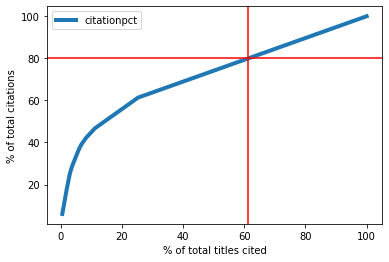

In [173]:
newlines = citedRefMeta_count.plot.line(x='titlepct', y='citationpct', linewidth=4)
newlines.axhline(y=80, color='r')
newlines.axvline(x=pctile, color='r')
newlines.set_ylabel('% of total citations')
newlines.set_xlabel('% of total titles cited')
plt.show()

## Experimental stuff below

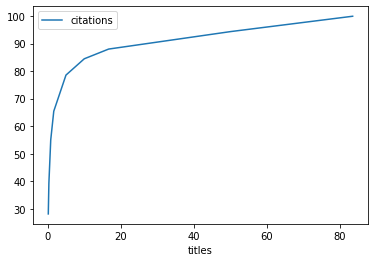

In [91]:
df = pd.DataFrame({ 'titles': [.17, .33, .84, 1.67, 5.01, 10.02, 16.7, 50.11, 83.51],
    'citations': [28.14, 39.26, 55.04, 65.44, 78.56, 84.48, 88.01, 94.36, 99.93]
    }, index=[.17, .33, .84, 1.67, 5.01, 10.02, 16.7, 50.11, 83.51])
lines = df.plot.line(x='titles', y='citations')

plt.show()

In [59]:
re.search('^Python', text)

<re.Match object; span=(0, 6), match='Python'>

In [55]:
text = 'Python is great'

Some regex experiments

In [336]:
ucb_citedref_split.CR[58386]

'Gilichinsky D.A., 2011, ENCY GEOBIOLOGY, P726, DOI [DOI 10.1007/978-1-4020-9212-1_162, 10.1007/978-1-4020-9212-1 162]'

In [48]:
text1 = ucb_citedref_split.CR[68]

In [49]:
text2 = ucb_citedref_split.CR[70]

In [84]:
text3 = ucbCRsample.CR[262]

In [85]:
text4 = ucbCRsample.CR[458]

In [86]:
print(text1)
print(text2)
print(text3)
print(text4)

DIETRICH WE, 1995, HYDROL PROCESS, V9, P383, DOI 10.1002/hyp.3360090311
Dietrich WE, 2008, P 4 INT C DEBR FLOW
Koven CD, 2013, NAT GEOSCI, V6, P452, DOI [10.1038/ngeo1801, 10.1038/NGEO1801]
Raich J. W., 2001, GLOBAL ANN SOIL RESP, DOI [10. 3334/ORNLDAAC/622, DOI 10.3334/0RNLDAAC/622]


In [148]:
re.findall('10\.\S*[^]\s]', text3)[0].split(',')[0]

'10.1038/ngeo1801'

In [73]:
re.sub('^.+?(?=10)','', text)

NameError: name 'text' is not defined

In [226]:
print(doi)

['DOI 10.5281/ZENODO.1054761]']


In [116]:
page = re.findall('\sP\S*,', text)

parsing the crossref response

In [37]:
response = requests.get('http://api.crossref.org/works/10.1002/9781118358092')

In [38]:
data = json.loads(response.content.decode('utf-8'))

In [39]:
jTitle = data['message']['container-title']

In [424]:
issn1 = data['message']['issn-type'][0]['value']

In [429]:
issn1Type = data['message']['issn-type'][0]['type']

In [ ]:
if len(data['message']['issn-type'])>1:
    issn2 = data['message']['issn-type'][1]['value']
    issn1Type = data['message']['issn-type'][1]['type']

In [43]:
if
data['message']['container-title']

[]

In [40]:
data

{'status': 'ok',
 'message-type': 'work',
 'message-version': '1.0.0',
 'message': {'indexed': {'date-parts': [[2020, 3, 28]],
   'date-time': '2020-03-28T02:47:51Z',
   'timestamp': 1585363671073},
  'publisher-location': 'Chichester, UK',
  'reference-count': 0,
  'publisher': 'John Wiley & Sons, Ltd',
  'isbn-type': [{'value': '9780470671511', 'type': 'print'},
   {'value': '9781118358092', 'type': 'electronic'}],
  'content-domain': {'domain': [], 'crossmark-restriction': False},
  'short-container-title': [],
  'published-print': {'date-parts': [[2012, 10, 26]]},
  'DOI': '10.1002/9781118358092',
  'type': 'book',
  'created': {'date-parts': [[2012, 9, 20]],
   'date-time': '2012-09-20T09:20:39Z',
   'timestamp': 1348132839000},
  'source': 'Crossref',
  'is-referenced-by-count': 6,
  'title': ['The Biology and Ecology of Tintinnid Ciliates'],
  'prefix': '10.1002',
  'member': '311',
  'container-title': [],
  'original-title': [],
  'deposited': {'date-parts': [[2012, 9, 20]],
 